## Used car sales

In [1]:
# import the required packages

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### Data Acquisition

In [2]:
# read the csv data 
# note that data doesnt have any headers.

file_cloud_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
car_df = pd.read_csv('./data/auto.csv', header=None)

car_df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# create a headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

car_df.columns = headers

car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Wrangling

In [4]:
#replace ? with NaN values
car_df.replace('?', np.NaN, inplace= True)

#find the columns with NaN
car_df.isna().any()


symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [5]:
# to find the dtype of the columns
car_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Replace NaN values with *mean* for the following columns:
<ul>
    <li>normalized-losses</li>
    <li>stroke</li>
    <li>bore</li>
    <li>horsepower</li>
    <li>peak-rpm</li>
</ul>

In [6]:
#replace NaN with the mean in normalized-losses column

mean_norm_loss = car_df['normalized-losses'].astype('float').mean()

car_df['normalized-losses'].replace(np.NaN, mean_norm_loss, inplace=True)

In [7]:
#replace NaN with the mean in bore column

mean_stroke = car_df['bore'].astype('float').mean()

car_df['bore'].replace(np.NaN, mean_norm_loss, inplace=True)

In [8]:
#replace NaN with the mean in stroke column

mean_stroke = car_df['stroke'].astype('float').mean()

car_df['stroke'].replace(np.NaN, mean_norm_loss, inplace=True)

In [9]:
#replace NaN with the mean in horsepower column

mean_stroke = car_df['horsepower'].astype('float').mean()

car_df['horsepower'].replace(np.NaN, mean_norm_loss, inplace=True)

In [10]:
#replace NaN with the mean in peak-rpm column

mean_stroke = car_df['peak-rpm'].astype('float').mean()

car_df['peak-rpm'].replace(np.NaN, mean_norm_loss, inplace=True)

Replace NaN values with *mode* for the following columns:
<ul>
    <li>num-of-doors</li>
</ul>

In [11]:
mode_num_of_doors = car_df['num-of-doors'].value_counts().idxmax()

car_df['num-of-doors'].replace(np.NaN, mode_num_of_doors, inplace=True)

In [12]:
car_df.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

Since price is what we want to predict, any row without price cannot used for prediction.<br/>
So, drop all the rows with NaN values in price column.

In [13]:
#drop the rows with NaN values in 'price'
car_df.dropna(subset=['price'],axis=0, inplace=True)

#reset the index since we have dropped certain columns
car_df.reset_index(drop =True, inplace = True)


Convert data types to proper format

In [14]:
car_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert the following columns to float:
<ul>
    <li>price</li>
    <li>stroke</li>
    <li>bore</li>
</ul>

Convert the following columns to int:
<ul>
    <li>normalized-losses</li>
    <li>horsepower</li>
    <li>peak-rpm</li>
</ul>

In [15]:
car_df[["bore","stroke","price"]] = car_df[["bore","stroke","price"]].astype("float")
car_df[["normalized-losses","peak-rpm","horsepower"]] = car_df[["normalized-losses","peak-rpm","horsepower"]].astype("int64")


#### Data Normalization

Normalize the variables so their value ranges from 0 to 1

In [16]:
car_df['length'] = car_df['length']/car_df['length'].max()
car_df['width'] = car_df['width']/car_df['width'].max()
car_df['height'] = car_df['height']/car_df['height'].max()

car_df[['length','width','height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


#### Binning

Convert 'Horsepower' to categories such as Low, Medium and High

Text(0.5, 1.0, 'horsepower bins')

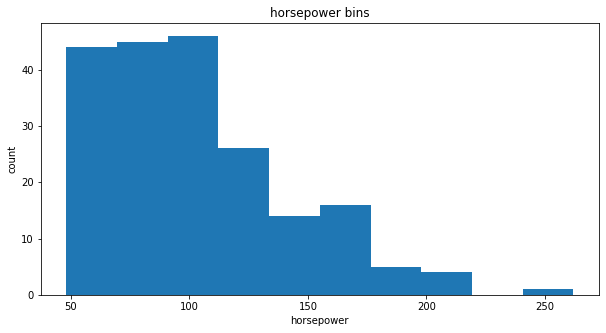

In [17]:
plt.figure(figsize=(10,5))

plt.hist(car_df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [18]:
bin_values = np.linspace(min(car_df["horsepower"]), max(car_df["horsepower"]), 4)

bin_names = ['Low', 'Medium', 'High']

car_df['horsepower-binned'] = pd.cut(car_df['horsepower'], bins=bin_values, labels= bin_names, include_lowest=True)

car_df['horsepower-binned'].value_counts()

Low       151
Medium     45
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

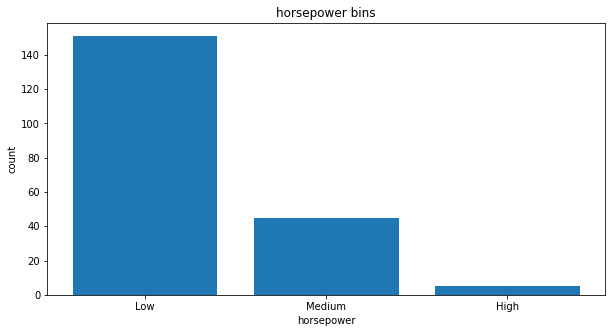

In [19]:
plt.figure(figsize=(10,5))

plt.bar(bin_names, car_df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

The above bar chart is similar to the histogram plot when binned with 3

Text(0.5, 1.0, 'horsepower bins')

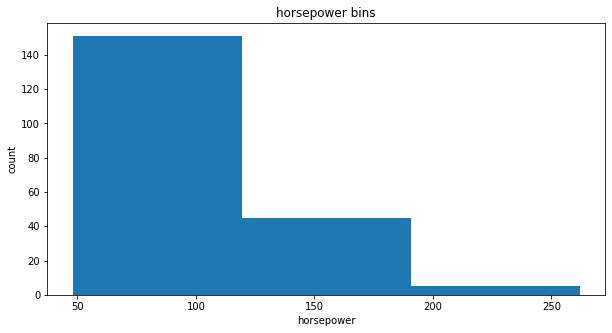

In [20]:
plt.figure(figsize=(10,5))

plt.hist(car_df["horsepower"], bins=3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### Indicator or Dummy Variables

In [21]:
#To do regression, we need to convert fuel-type column to indicator variables
dummy_variable = pd.get_dummies(car_df['fuel-type'])

dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

car_df = pd.concat([car_df, dummy_variable], axis=1)

car_df.drop("fuel-type", axis = 1, inplace=True)

### Exploratory Data Analysis


In [22]:
#correlation of the numeric variables in car_df 

car_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.243521,0.245613,-0.182196,0.076328,0.184721,-0.035527,0.036233,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.124511,0.126034,-0.114713,0.217034,0.166059,-0.225016,-0.181877,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,-0.074380,-0.079330,0.250313,0.368584,-0.217522,-0.470606,-0.543304,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,-0.050463,-0.057929,0.159733,0.581018,-0.227380,-0.665192,-0.698142,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,-0.004059,-0.009260,0.189867,0.615817,-0.193213,-0.633531,-0.680635,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.240217,-0.244270,0.259737,-0.088696,-0.187717,-0.049800,-0.104812,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,-0.029485,-0.036691,0.156433,0.756718,-0.188590,-0.749543,-0.794889,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,-0.177698,-0.183013,0.028889,0.822255,-0.186924,-0.650546,-0.679571,0.872335,0.070779,-0.070779
bore,0.243521,0.124511,-0.074380,-0.050463,-0.004059,-0.240217,-0.029485,-0.177698,1.000000,0.999672,-0.027237,0.031766,0.189485,-0.196827,-0.170635,0.005399,-0.046482,0.046482
stroke,0.245613,0.126034,-0.079330,-0.057929,-0.009260,-0.244270,-0.036691,-0.183013,0.999672,1.000000,-0.023685,0.024642,0.189387,-0.188074,-0.161747,-0.001799,-0.042777,0.042777


From the correlation table above we need to select the variables to test individual relationship with price

#### Continous Numerical Variables:

##### Positive Linear Relationship


            wheel-base     price
wheel-base    1.000000  0.584642
price         0.584642  1.000000


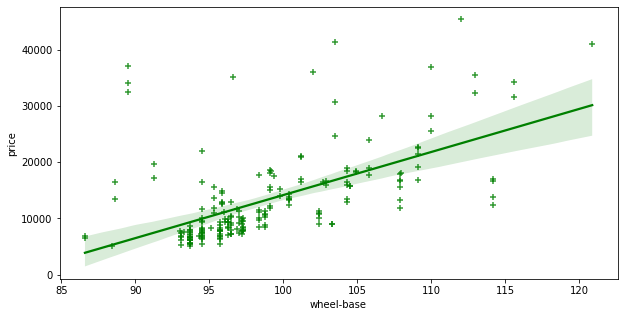

In [23]:
# Wheel-base and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'wheel-base', y='price', data=car_df, color='green', marker="+")

print(car_df[['wheel-base','price']].corr())

          length     price
length  1.000000  0.690628
price   0.690628  1.000000


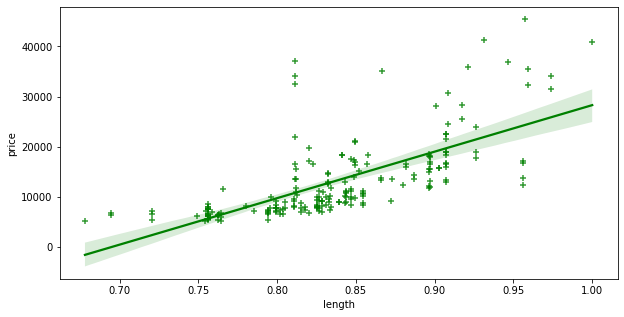

In [24]:
# Length and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'length', y='price', data=car_df, color='green', marker='+')

print(car_df[['length','price']].corr())

          width     price
width  1.000000  0.751265
price  0.751265  1.000000


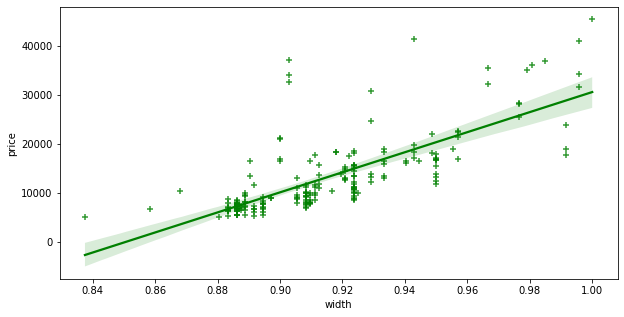

In [25]:
# Width and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'width', y='price', data=car_df, color='green', marker="+")

print(car_df[['width','price']].corr())

             curb-weight     price
curb-weight     1.000000  0.834415
price           0.834415  1.000000


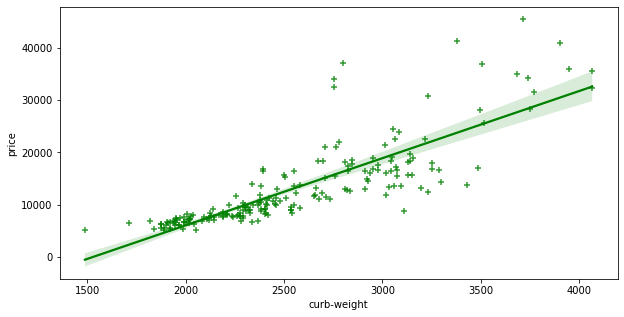

In [26]:
# Curb-Weight and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'curb-weight', y='price', data=car_df, color='green', marker='+')

print(car_df[['curb-weight','price']].corr())

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


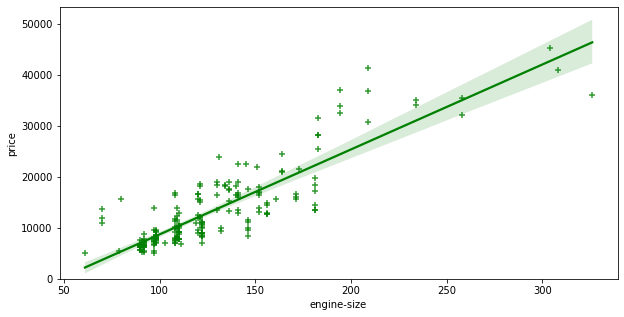

In [27]:
# Engine Size and Price

plt.figure(figsize=(10,5))
sns.regplot(x="engine-size", y="price", data=car_df, color='green', marker='+')
plt.ylim(0,)

print(car_df[['engine-size','price']].corr())

            horsepower     price
horsepower    1.000000  0.806429
price         0.806429  1.000000


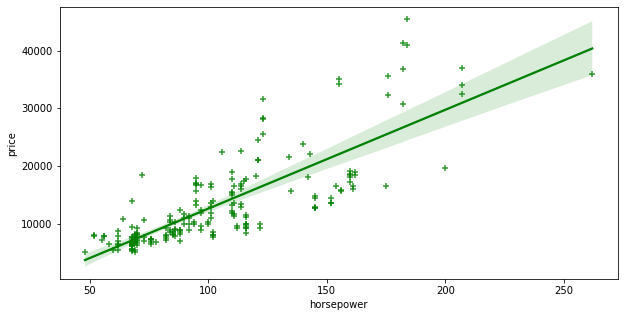

In [28]:
# Horsepower and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'horsepower', y='price', data=car_df, color='green', marker='+')

print(car_df[['horsepower','price']].corr())

#### Negative Linear Relationship


          city-mpg     price
city-mpg  1.000000 -0.686571
price    -0.686571  1.000000


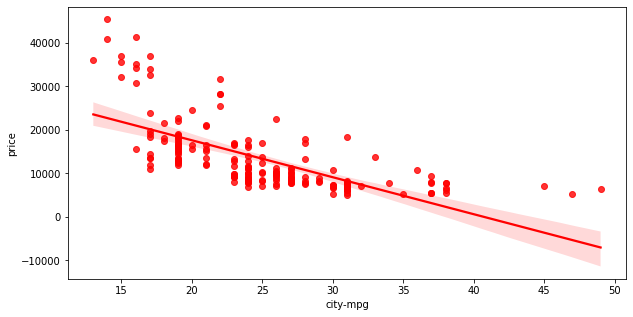

In [29]:
# City-MPG and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'city-mpg', y='price', data=car_df, color='red')

print(car_df[['city-mpg','price']].corr())

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


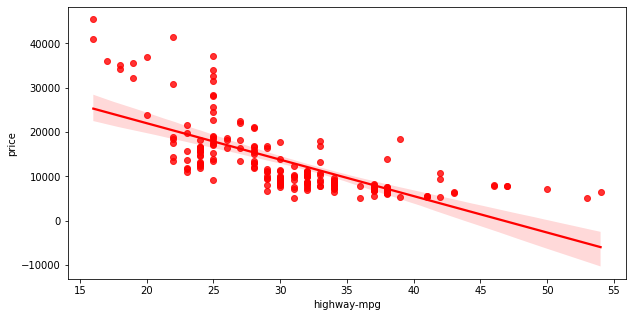

In [30]:
# Highway-MPG and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'highway-mpg', y='price', data=car_df, color='red')

print(car_df[['highway-mpg','price']].corr())

#### Weak Linear Relationship

                   normalized-losses     price
normalized-losses           1.000000  0.133999
price                       0.133999  1.000000


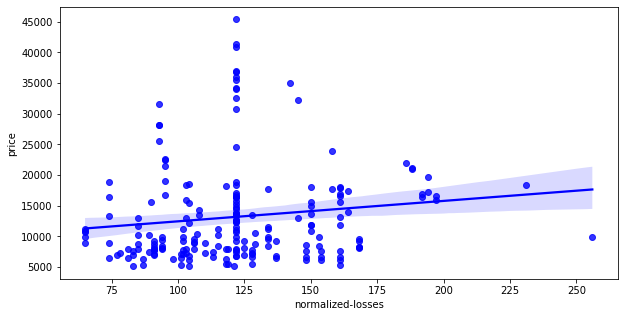

In [31]:
# Normalized-losses and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'normalized-losses', y='price', data=car_df, color='blue')

print(car_df[['normalized-losses','price']].corr())

           bore     price
bore   1.000000  0.005399
price  0.005399  1.000000


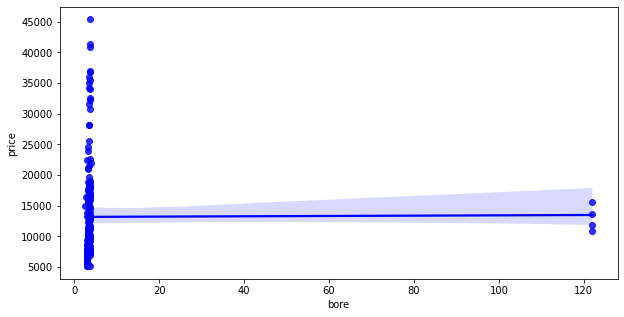

In [32]:
# bore and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'bore', y='price', data=car_df, color='blue')

print(car_df[['bore','price']].corr())

          height     price
height  1.000000  0.135486
price   0.135486  1.000000


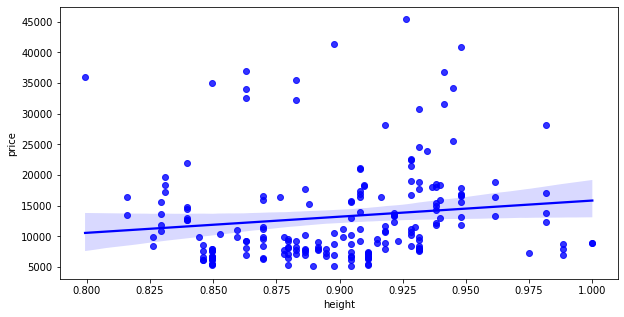

In [33]:
# Height and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'height', y='price', data=car_df, color='blue')

print(car_df[['height','price']].corr())

          stroke     price
stroke  1.000000 -0.001799
price  -0.001799  1.000000


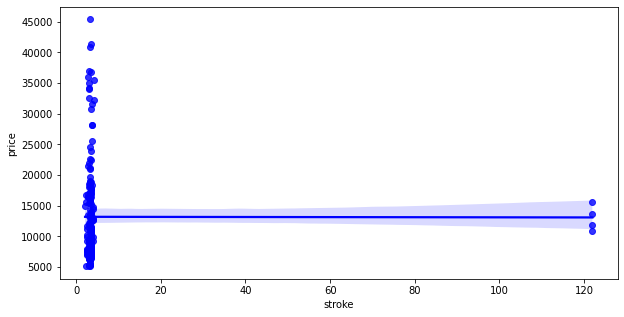

In [34]:
# Stroke and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'stroke', y='price', data=car_df, color='blue')

print(car_df[['stroke','price']].corr())

                   compression-ratio     price
compression-ratio           1.000000  0.071107
price                       0.071107  1.000000


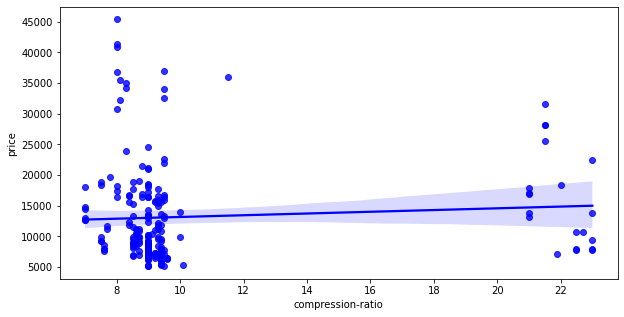

In [35]:
# compression-ratio and Price

plt.figure(figsize=(10,5))
sns.regplot(x = 'compression-ratio', y='price', data=car_df, color='blue')

print(car_df[['compression-ratio','price']].corr())

          peak-rpm    price
peak-rpm   1.00000 -0.03747
price     -0.03747  1.00000


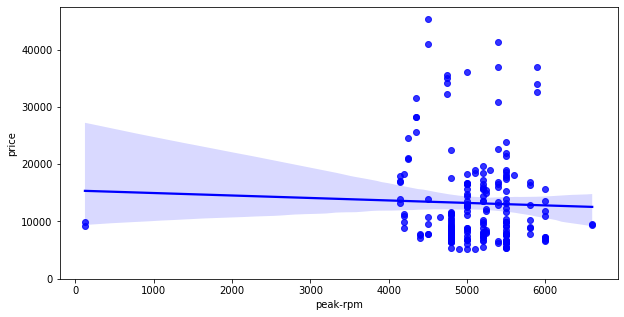

In [36]:
# peak-rpm and Price

plt.figure(figsize=(10,5))
sns.regplot(x="peak-rpm", y="price", data=car_df, color='blue')
plt.ylim(0,)

print(car_df[['peak-rpm','price']].corr())

                  fuel-type-diesel     price
fuel-type-diesel          1.000000  0.110326
price                     0.110326  1.000000


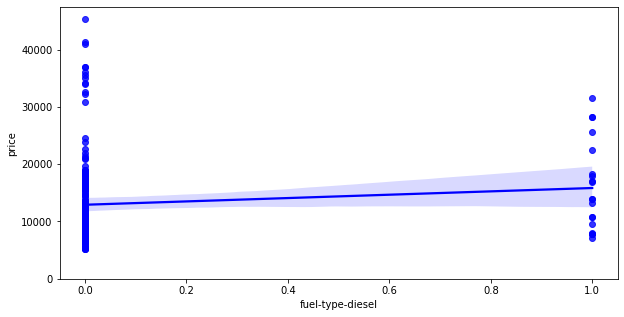

In [37]:
# fuel-type-diesel and Price

plt.figure(figsize=(10,5))
sns.regplot(x="fuel-type-diesel", y="price", data=car_df, color='blue')
plt.ylim(0,)

print(car_df[['fuel-type-diesel','price']].corr())

               fuel-type-gas     price
fuel-type-gas       1.000000 -0.110326
price              -0.110326  1.000000


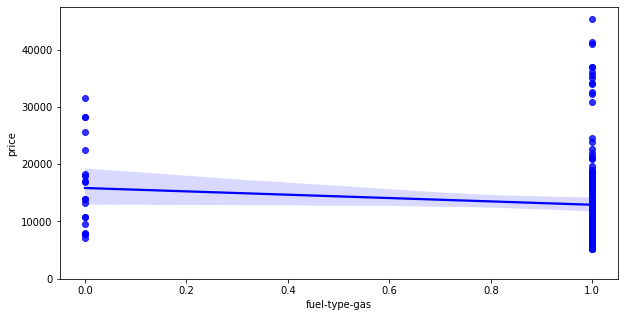

In [38]:
# fuel-type-gas and Price

plt.figure(figsize=(10,5))
sns.regplot(x="fuel-type-gas", y="price", data=car_df, color='blue')
plt.ylim(0,)

print(car_df[['fuel-type-gas','price']].corr())

In short:<br/>   
<ul> Potential good predictor of price are
    <li>wheel-base</li>
    <li>length</li>
    <li>width</li>
    <li>curb-weight</li>
    <li>engine-size</li>
    <li>horsepower</li>
    <li>city-mpg</li>
    <li>highway-mpg</li>
</ul>

<h3>Categorical Variables</h3>

We use boxplots to identify the relationship of categorical variables on price.<br/>
If there isn't significant overlap between the categories, then it could be a potential predictor for the price. 

In [39]:
car_df.dtypes

symboling               int64
normalized-losses       int64
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm                int64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
dtype: object

<AxesSubplot:xlabel='make', ylabel='price'>

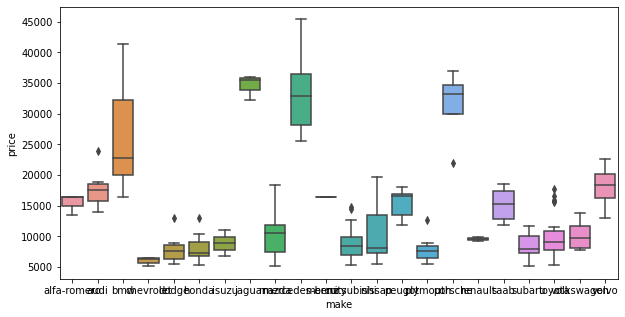

In [40]:
#make vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="make", y="price", data=car_df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

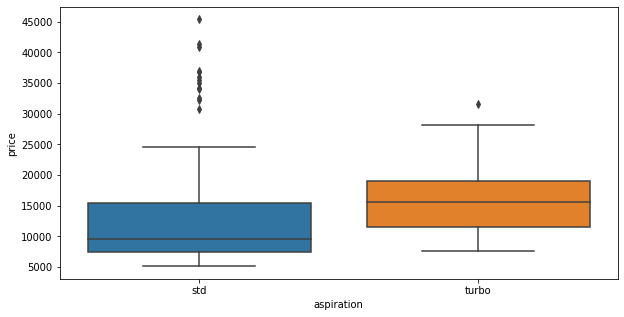

In [41]:
#aspiration vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="aspiration", y="price", data=car_df)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

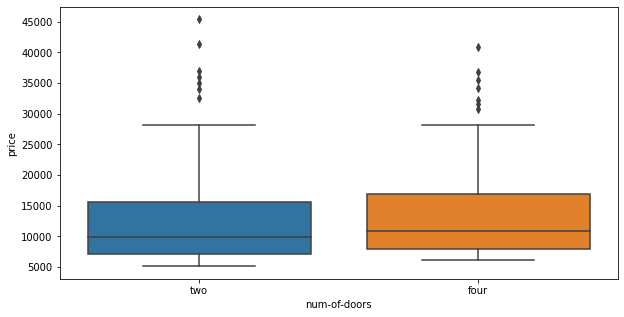

In [42]:
#num-of-doors vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="num-of-doors", y="price", data=car_df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

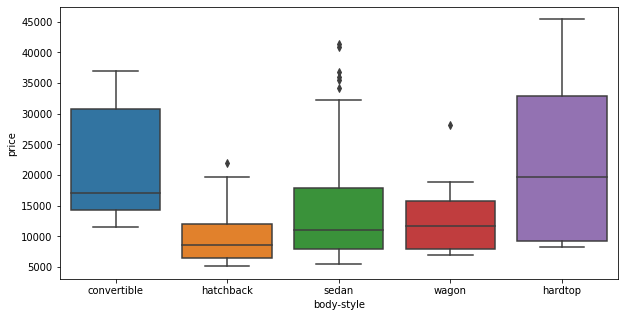

In [43]:
#body-style vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="body-style", y="price", data=car_df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

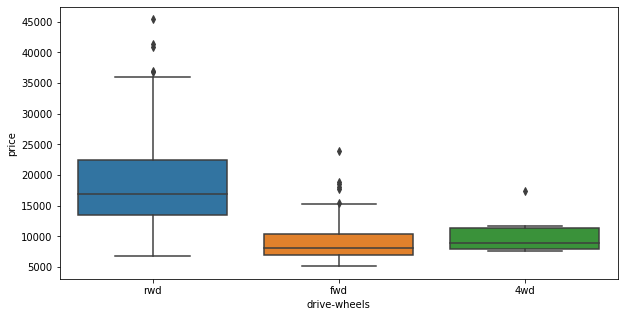

In [44]:
#drive-wheels  vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="drive-wheels", y="price", data=car_df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

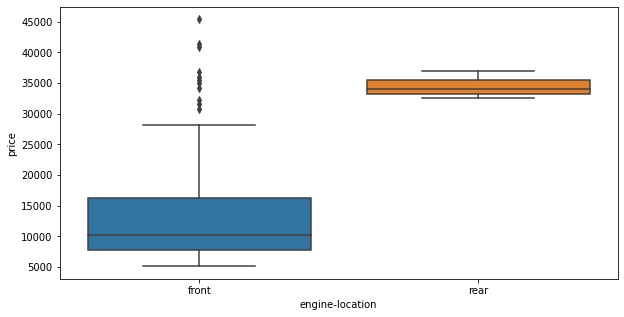

In [45]:
#engine-location  vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="engine-location", y="price", data=car_df)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

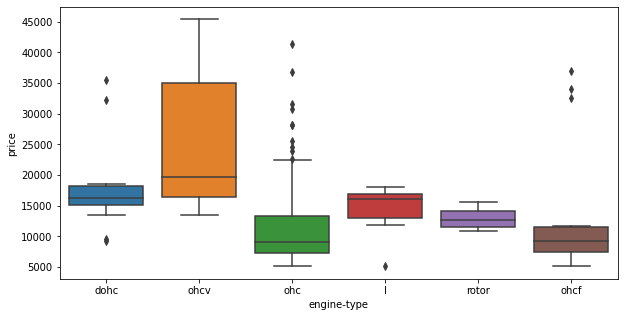

In [46]:
#engine-type vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="engine-type", y="price", data=car_df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

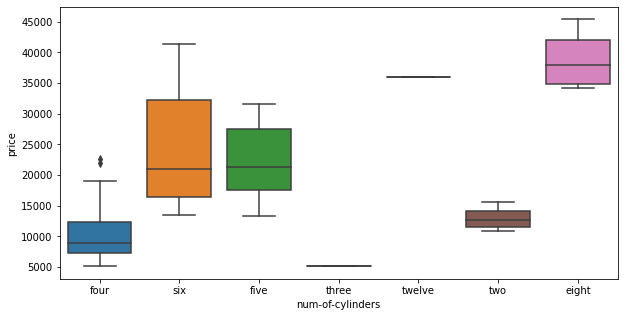

In [47]:
#num-of-cylinders  vs price

plt.figure(figsize=(10,5))
sns.boxplot(x="num-of-cylinders", y="price", data=car_df)

From above boxplots the variables that could predict the price are:
<li>num-of-cylinders</li>
<li>engine-type</li>
<li>engine-location</li>
<li>drive-wheels</li>

In [48]:
drive_wheel_count = car_df['drive-wheels'].value_counts().to_frame()
drive_wheel_count.rename(columns={'drive-wheels':'value_count'}, inplace=True)
drive_wheel_count.index.name = 'drive-wheels'
drive_wheel_count

,value_count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [49]:
engine_location_count = car_df['engine-location'].value_counts().to_frame()
engine_location_count.rename(columns={'engine-location':'value_count'}, inplace=True)
engine_location_count.index.name = 'engine-location'
engine_location_count

,value_count
engine-location,
front,198
rear,3


In [50]:
engine_type_count = car_df['engine-type'].value_counts().to_frame()
engine_type_count.rename(columns={'engine-type':'value_count'}, inplace=True)
engine_type_count.index.name = 'engine-type'
engine_type_count

,value_count
engine-type,
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


In [51]:
num_of_cylinders_count = car_df['num-of-cylinders'].value_counts().to_frame()
num_of_cylinders_count.rename(columns={'num-of-cylinders':'value_count'}, inplace=True)
num_of_cylinders_count.index.name = 'num-of-cylinders'
num_of_cylinders_count

,value_count
num-of-cylinders,
four,157
six,24
five,10
two,4
eight,4
three,1
twelve,1


From the value_count it is clear that out of all categorical variables only drive-wheels can be considered since the data is not biased.

#### Grouping

In [52]:
df_gptest = car_df[['drive-wheels','body-style','num-of-cylinders','price']]


In [53]:
wheels = df_gptest.groupby(['drive-wheels'],as_index=False).mean()
wheels

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [54]:
body = df_gptest.groupby(['body-style'],as_index=False).mean()
body

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [55]:
cylinders = df_gptest.groupby(['body-style'],as_index=False).mean()
cylinders

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [56]:
wheels_and_body = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()

wheels_body_pivot = wheels_and_body.pivot('drive-wheels','body-style','price').fillna(0)

wheels_body_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


In [57]:
wheels_and_cylinders = df_gptest.groupby(['drive-wheels','num-of-cylinders'],as_index=False).mean()

wheels_cylinder_pivot = wheels_and_cylinders.pivot('drive-wheels','num-of-cylinders','price').fillna(0)

wheels_cylinder_pivot

num-of-cylinders,eight,five,four,six,three,twelve,two
drive-wheels,,,,,,,
4wd,0.0,17450.0,9211.142857,0.000000,0.0,0.0,0.0
fwd,0.0,17810.0,8764.091743,13799.000000,5151.0,0.0,0.0
rwd,38900.0,28394.0,14581.414634,25082.238095,0.0,36000.0,13020.0


#### Variables: Drive Wheels and Body Style vs. Price


<AxesSubplot:xlabel='body-style', ylabel='drive-wheels'>

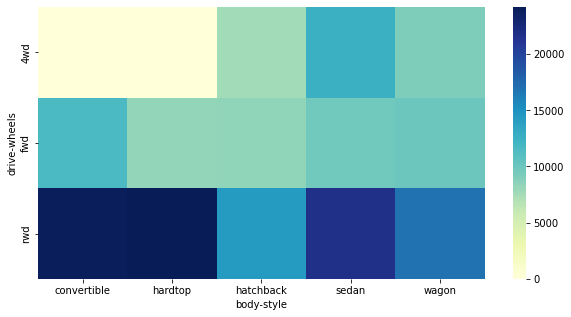

In [58]:
#heatmap of drive-wheels and body-style

plt.figure(figsize=(10,5))

sns.heatmap(wheels_body_pivot, cmap="YlGnBu")

<AxesSubplot:xlabel='num-of-cylinders', ylabel='drive-wheels'>

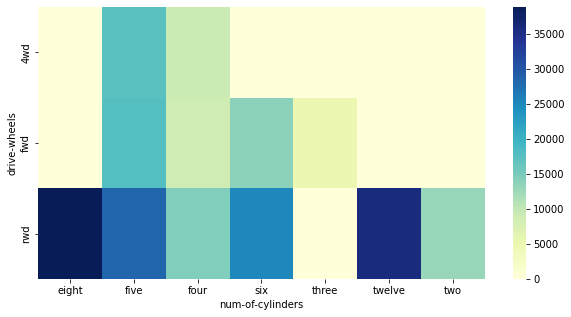

In [59]:
#heatmap of drive-wheels and num-of-cylinders

plt.figure(figsize=(10,5))

sns.heatmap(wheels_cylinder_pivot, cmap="YlGnBu")

### Correlation and Causation

#### For Continous numerical variables

##### Wheel-Base vs. Price

In [60]:
pearson_coef, p_value = stats.pearsonr(car_df['wheel-base'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant,<br/> although the linear relationship isn't even moderately strong (~0.585)

##### Length vs. Price

In [61]:
pearson_coef, p_value = stats.pearsonr(car_df['length'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P = 8.016477466159328e-30


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the linear relationship is moderately strong (~0.691)

##### Width vs. Price

In [62]:
pearson_coef, p_value = stats.pearsonr(car_df['width'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the linear relationship is quite strong (~0.751)

##### Curb-weight vs. Price

In [63]:
pearson_coef, p_value = stats.pearsonr(car_df['curb-weight'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the linear relationship is quite strong (~0.834)

##### Engine-size vs. Price

In [64]:
pearson_coef, p_value = stats.pearsonr(car_df['engine-size'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200232e-64


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the linear relationship is very strong (~0.872 close to 1) 

##### Horsepower vs. Price

In [65]:
pearson_coef, p_value = stats.pearsonr(car_df['horsepower'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.806429390457692  with a P-value of P = 2.7444670418335615e-47


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the linear relationship is quite strong (~0.8064)

##### City-mpg vs. Price

In [66]:
pearson_coef, p_value = stats.pearsonr(car_df['city-mpg'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P = 2.321132065567641e-29


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

##### Highway-mpg vs. Price

In [67]:
pearson_coef, p_value = stats.pearsonr(car_df['highway-mpg'], car_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P = 1.7495471144476358e-31


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant,<br/> and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


#### For Categorical variables

Drive-Wheels vs Price

In [68]:
drive_wheels_grouped=car_df[['drive-wheels', 'price']].groupby(['drive-wheels'])

drive_wheels_grouped.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [69]:
# ANOVA
f_val, p_val = stats.f_oneway(drive_wheels_grouped.get_group('fwd')['price'], drive_wheels_grouped.get_group('rwd')['price'], drive_wheels_grouped.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


A sizeable F-test score and a small P_value indicates that the drive-wheels is strongly correlated with price.

Number-of-Cylinders vs Price

In [70]:
cylinders_grouped=car_df[['num-of-cylinders','price']].groupby(['num-of-cylinders'])

cylinders_grouped.head(5)


,num-of-cylinders,price
0,four,13495.0
1,four,16500.0
2,six,16500.0
3,four,13950.0
4,five,17450.0
5,five,15250.0
6,five,17710.0
7,five,18920.0
8,five,23875.0
9,four,16430.0


In [71]:
# ANOVA
f_val, p_val = stats.f_oneway(cylinders_grouped.get_group('two')['price'], cylinders_grouped.get_group('three')['price'], 
                cylinders_grouped.get_group('four')['price'], cylinders_grouped.get_group('five')['price'], 
                cylinders_grouped.get_group('six')['price'], cylinders_grouped.get_group('eight')['price'], 
                cylinders_grouped.get_group('twelve')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 54.943653046632406 , P = 2.8701445428124514e-39


A sizeable F-test score and a small P_value indicates that the num-of-cylinders is strongly correlated with price.

### CONCLUSION
The following variables can predict the price of a used car.

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
    <li>Num-of-cylinders</li>